In [145]:
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt

oligoDf = pd.read_csv('/home/aaron/jupyter/Synthego/synthData.csv')
oligoDf.head()

,four_letter_sequence,synthesis_id,n-1,n+1,pure_yield,full_length_product,other_impurity,synthesis_duration,postprocessing_duration
0,-Gms-Ums-Cms-Gro-Cro-Uro-Cro-Cro-Cro-Cro-Gro-G...,1,4.797640,6.381929,8.795529,74.553685,0.021143,55.654369,35.755761
1,-Ums-Cms-Ams-Gro-Gro-Cro-Cro-Gro-Cro-Aro-Gro-G...,1,8.056743,8.434807,6.089592,74.963525,0.053352,55.654369,35.755761
2,-Gms-Ums-Ams-Uro-Aro-Uro-Aro-Gro-Aro-Uro-Gro-A...,1,5.376105,10.042194,9.068502,73.169193,0.000000,55.654369,35.755761
3,-Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-G...,1,1.932084,10.383295,4.258049,73.053785,0.000000,55.654369,35.755761
4,-Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-G...,1,7.064074,4.899295,9.150096,77.128862,0.000000,55.654369,35.755761


In [146]:
def oligoFunc(stg):
    oligoLen = sum(1 for x in stg if x.isupper())
    oligoType = ''
    if 'm' in stg and 'r' in stg:
        oligoType = 'mod RNA'
    elif 'd' in stg and 'r' in stg:
        oligoType = 'chimera'
    else:
        oligoType = 'vanilla RNA'
    return (oligoLen, oligoType)

In [147]:
colRef = list(oligoDf)
colRef

['four_letter_sequence',
 'synthesis_id',
 'n-1',
 'n+1',
 'pure_yield',
 'full_length_product',
 'other_impurity',
 'synthesis_duration',
 'postprocessing_duration']

In [148]:
newColRef= {a:b for a,b in zip(colRef, ['Seq Type', 'Synthesis ID','N-1', 'N+1', 'Pure Yield', 'FL Product', 'Impurity', 'Synthesis Duration', 'Postprocessing Duration'])}
newColRef

{'four_letter_sequence': 'Seq Type',
 'synthesis_id': 'Synthesis ID',
 'n-1': 'N-1',
 'n+1': 'N+1',
 'pure_yield': 'Pure Yield',
 'full_length_product': 'FL Product',
 'other_impurity': 'Impurity',
 'synthesis_duration': 'Synthesis Duration',
 'postprocessing_duration': 'Postprocessing Duration'}

In [149]:
# Change the column titles
oligoDf.rename(columns=newColRef, inplace=True)
oligoDf = oligoDf.set_index('Synthesis ID')
oligoDf.head()

,Seq Type,N-1,N+1,Pure Yield,FL Product,Impurity,Synthesis Duration,Postprocessing Duration
Synthesis ID,,,,,,,,
1,-Gms-Ums-Cms-Gro-Cro-Uro-Cro-Cro-Cro-Cro-Gro-G...,4.797640,6.381929,8.795529,74.553685,0.021143,55.654369,35.755761
1,-Ums-Cms-Ams-Gro-Gro-Cro-Cro-Gro-Cro-Aro-Gro-G...,8.056743,8.434807,6.089592,74.963525,0.053352,55.654369,35.755761
1,-Gms-Ums-Ams-Uro-Aro-Uro-Aro-Gro-Aro-Uro-Gro-A...,5.376105,10.042194,9.068502,73.169193,0.000000,55.654369,35.755761
1,-Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-G...,1.932084,10.383295,4.258049,73.053785,0.000000,55.654369,35.755761
1,-Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-G...,7.064074,4.899295,9.150096,77.128862,0.000000,55.654369,35.755761


In [150]:
# Apply oligoFunc to the Seq Type info
oligoDf['Seq Type'] = oligoDf['Seq Type'].apply(oligoFunc)
oligoDf.head()

,Seq Type,N-1,N+1,Pure Yield,FL Product,Impurity,Synthesis Duration,Postprocessing Duration
Synthesis ID,,,,,,,,
1,"(100, mod RNA)",4.797640,6.381929,8.795529,74.553685,0.021143,55.654369,35.755761
1,"(100, mod RNA)",8.056743,8.434807,6.089592,74.963525,0.053352,55.654369,35.755761
1,"(100, mod RNA)",5.376105,10.042194,9.068502,73.169193,0.000000,55.654369,35.755761
1,"(100, mod RNA)",1.932084,10.383295,4.258049,73.053785,0.000000,55.654369,35.755761
1,"(100, mod RNA)",7.064074,4.899295,9.150096,77.128862,0.000000,55.654369,35.755761


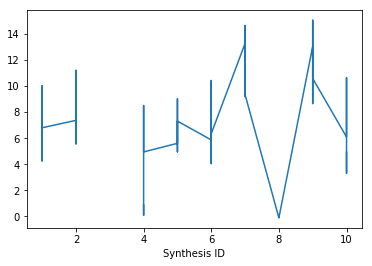

In [151]:
oligoDf['Pure Yield'].plot()

In [176]:
MaxPY = oligoDf['Pure Yield'].max()
MaxID = dict(oligoDf['Seq Type'][oligoDf['Pure Yield'] == oligoDf['Pure Yield'].max()])
MaxTxt = '''
Highest Pure Yield: {}
Sythesis ID: {}
Oligo Length: {}
Oligo Type: {}
'''.format(str(MaxPY), list(MaxID.keys())[0], list(MaxID.values())[0][0], list(MaxID.values())[0][1])

print(MaxTxt)


Highest Pure Yield: 15.046220954862301
Sythesis ID: 9
Oligo Length: 36
Oligo Type: chimera



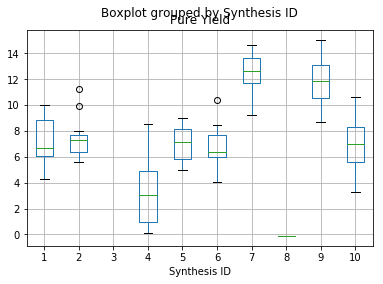

In [205]:
oligoDf.boxplot('Pure Yield', 'Synthesis ID')